In [1]:
import pandas as pd
import numpy as np

## 二项分布 `numpy.random.binomial`
* 参数
    * n 试验次数
    * p 概率
    * size 重复测试次数 output shape
* 返回值
    * 从二项分布中抽取样本，其中每个样本等于 n 次试验成功的次数
    
[文档](https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.binomial.html)

In [16]:
#第一个参数是运行的次数 n，第二个参数是为 0 的概率p，还有一个参数 size 默认为 None
np.random.binomial(1, 0.5)
# 抛均匀硬币 1 次成功(正面？)的次数
#结果为 0/1

0

In [20]:
# 抛均匀硬币 1000 次成功的次数
np.random.binomial(1000, 0.5)

538

In [21]:
# 抛均匀硬币 1000 次成功的概率
np.random.binomial(1000, 0.5) / 1000

0.501

### Test
> Suppose we want to simulate the probability of flipping a fair coin 20 times, and getting a number greater than or qwual to 15. Use np.random.binomial(n, p, size) to do 10000 simulations of flipping a fair coin 20 times, then see what proportion of the simulations are 15 or greater

In [30]:
# x 为抛均匀硬币 20 次，重复测试 10000 次成功的次数
# x 是一个 np.ndarray ,一维数组，有10000个数据，每一个数指每个 20 次抛硬币中成功的次数
x = np.random.binomial(20, 0.5, 10000)
# 每次成功次数大于等于15次的概率
# x >= 15 返回 True/False => 转化为 0/1 => 利用mean()即求概率
print((x >= 15).mean())

0.0197


In [31]:
chance_of_tornado = 0.01 / 100
np.random.binomial(100000, chance_of_tornado)

6

In [6]:
#连续两天有龙卷风的次数
chance_of_tornado = 0.01
tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
two_days_in_a_row = 0
for j in range(1, len(tornado_events - 1)):
    if tornado_events[j] == 1 and tornado_events[j-1] == 1:
        two_days_in_a_row += 1
print("{} tornadoes back to back in {} years".format(two_days_in_a_row, 1000000/365))

99 tornadoes back to back in 2739.72602739726 years


## 正态分布

`numpy.random.normal(loc = 0.0, scale = 1.0, size = None)`
* loc
    - The Mean of the distribution
    - centre
* scale
    - The standard deviation of the distribution
    - spread
* size
    - output shape
* 
[文档](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

In [33]:
np.random.normal(0.75)

0.4569760252313362

### numpy 计算标准差

* standard deviation

标准差 standard deviation 的计算公式
$$
\sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_i-\overline x)^2}
$$

In [47]:
# 根据公式计算标准差
# N 为 len(distribution)
# 平均值使用 np.mean(distribution)
# 求和使用 np.sum()
# 平方根使用 np.sqrt()
distribution = np.random.normal(0.75, size = 1000)
f_sd = np.sqrt(np.sum((np.mean(distribution) - distribution) ** 2)/len(distribution))

In [48]:
# 利用np.std计算标准差
np_sd = np.std(distribution)

In [49]:
print("the formula output is :{}\nthe numpy output is:{}".format(f_sd, np_sd))

the formula output is :1.0190296484120152
the numpy output is:1.0190296484120152


### scipy.stats 计算峰度、偏度

In [50]:
import scipy.stats as stats

* 峰度 kurtosis
    * 值为正，说明曲线比标准正态分布略有峰值
    * 值为负，说明曲线比标准正态分布平坦
    * 并不是测量分布本身的峰度，而是从分布中抽取的 1000 个值的峰度

In [51]:
stats.kurtosis(distribution)

-0.10440963728336161

* 偏度 skew

正态分布的偏度小？

In [52]:
stats.skew(distribution)

-0.06706680673842641

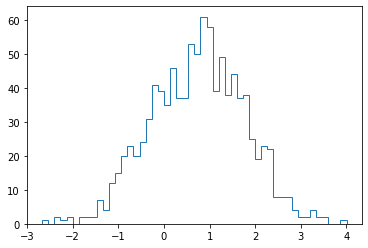

In [65]:
import matplotlib
import matplotlib.pyplot as plt

normal = plt.hist(distribution, bins = 50, histtype = 'step')

## 卡方分布


卡方分布只有一个参数 自由度
随着自由度增加，skew 降低，自由度趋向无穷，即为正态分布

In [60]:
# 自由度为 2 的卡方分布
chi_squared_df2 = np.random.chisquare(2, size = 10000)
stats.skew(chi_squared_df2)

1.8966818902267544

In [59]:
# 自由度为 5 的卡方分布
chi_squared_df5 = np.random.chisquare(5, size = 10000)
stats.skew(chi_squared_df5)

1.223884350043222

In [61]:
# 自由度为 10 的卡方分布
chi_squared_df10 = np.random.chisquare(10, size = 10000)
stats.skew(chi_squared_df10)

0.9075799425901542

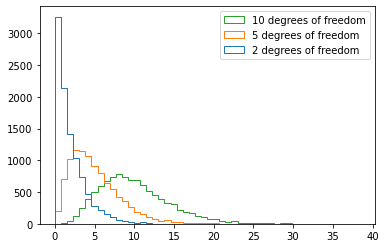

In [63]:
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2, chi_squared_df5, chi_squared_df10], bins=50, histtype='step', 
                  label=['2 degrees of freedom', '5 degrees of freedom', '10 degrees of freedom'])
plt.legend(loc='upper right')

In [66]:
df = pd.read_csv("grades.csv")

In [67]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [68]:
len(df)

2315

In [70]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [71]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [72]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [77]:
from scipy import stats
# 没有显著差异
stats.ttest_ind(early["assignment1_grade"], late["assignment1_grade"])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [78]:
# 没有显著差异
stats.ttest_ind(early["assignment2_grade"], late["assignment2_grade"])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067964)

In [76]:
stats.ttest_ind(early["assignment3_grade"], late["assignment3_grade"])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.08710151634155668)